In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.3625 - val_loss: 0.2713
Epoch 2/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2644 - val_loss: 0.2540
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2430 - val_loss: 0.2299
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2210 - val_loss: 0.2104
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2046 - val_loss: 0.1967
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1932 - val_loss: 0.1870
Epoch 7/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1847 - val_loss: 0.1797
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1780 - val_loss: 0.1736
Epoch 9/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1725 - val_loss: 0.1684
Epoch

In [27]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs_test = encoder.predict(x_test)
encoded_imgs_train = encoder.predict(x_train)

decoded_imgs_test = decoder.predict(encoded_imgs_test)

In [30]:
len(encoded_imgs_train[0])

32

In [11]:
encoded_imgs_test.shape

(10000, 32)

In [13]:
decoded_imgs_test.shape

(10000, 784)

In [14]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<Figure size 2000x400 with 20 Axes>

In [15]:
encoded_imgs_train.shape

(60000, 32)

In [16]:
from sklearn.neighbors import NearestNeighbors

In [17]:
# Fit kNN model on training images
knn = NearestNeighbors(n_neighbors=5, metric="cosine")
knn.fit(encoded_imgs_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [26]:
len(encoded_imgs_train)

60000

In [23]:
encoded_imgs_test[0]

array([ 2.1086993 , 11.748436  ,  5.2800617 ,  0.        ,  5.3010035 ,
        5.447629  ,  1.8945807 ,  6.4230766 , 14.463421  ,  9.89722   ,
        5.7743397 ,  6.361677  ,  6.117414  ,  5.512227  ,  1.5266222 ,
        4.4064913 ,  8.512761  ,  8.548204  ,  7.1612267 ,  1.344434  ,
        1.1463964 ,  7.1561995 ,  0.19646555, 14.5334425 ,  8.214953  ,
        6.764232  ,  8.647468  ,  0.16618395,  2.307799  ,  3.721736  ,
        3.6673892 ,  2.9726787 ], dtype=float32)

In [22]:
np.array(encoded_imgs_test[0]).reshape(1, 32)

array([[ 2.1086993 , 11.748436  ,  5.2800617 ,  0.        ,  5.3010035 ,
         5.447629  ,  1.8945807 ,  6.4230766 , 14.463421  ,  9.89722   ,
         5.7743397 ,  6.361677  ,  6.117414  ,  5.512227  ,  1.5266222 ,
         4.4064913 ,  8.512761  ,  8.548204  ,  7.1612267 ,  1.344434  ,
         1.1463964 ,  7.1561995 ,  0.19646555, 14.5334425 ,  8.214953  ,
         6.764232  ,  8.647468  ,  0.16618395,  2.307799  ,  3.721736  ,
         3.6673892 ,  2.9726787 ]], dtype=float32)

In [18]:
# Predict KNN for the first test image
distances, indices = knn.kneighbors(np.array(encoded_imgs_test[0]).reshape(1, 32))

In [21]:
indices

array([[53843, 53855, 47003, 27059, 14563]])

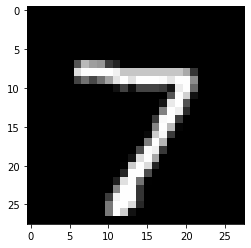

In [19]:
# First test image
plt.imshow(x_test[0].reshape(28,28))

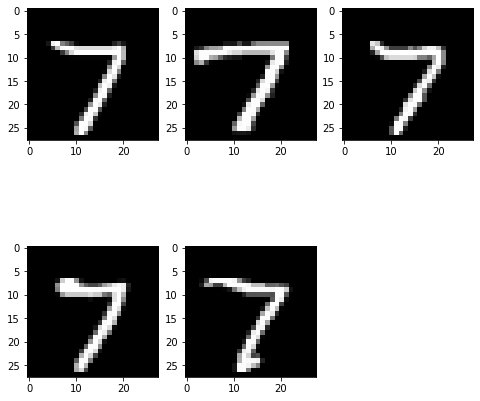

In [20]:
# n_neighbors of the test image
fig= plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i, idx in zip(range(1, columns*rows +1), np.nditer(indices)):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[idx].reshape(28, 28))
plt.show()

In [25]:
x_train.shape

(60000, 784)